# LSTM & GRU

RNN에 **기울기 정보 크기를 조절하기 위한 Gate를 추가한 모델을 LSTM**이라고 합니다.<br/>
요즘에는 단순한 RNN은 사용하지 않고 대부분 LSTM을 사용합니다.

RNN이라고 하면 당연히 LSTM이나 이후에 배울 GRU를 지칭할 정도로<br/>
LSTM은 Sequential 데이터를 처리하기 위한 대표적인 모델이 되었습니다.<br/>
오히려 전에 배운 RNN을 `기본적인 RNN(Vanilla RNN)`이라고 따로 구별하여 표현하기도 합니다.

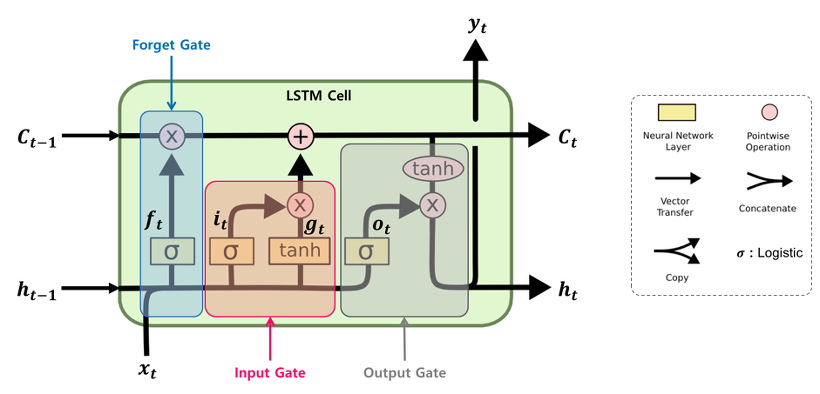

LSTM은 기울기 소실 문제를 해결하기 위해 3가지 게이트(gate)를 추가하였습니다. 각 게이트는 다음과 같은 역할을 합니다.

1. forget gate ($f_t$): 과거 정보를 얼마나 유지할 것인가?
2. input gate ($i_t$) : 새로 입력된 정보는 얼마만큼 활용할 것인가?
3. output gate ($o_t$) : 두 정보를 계산하여 나온 출력 정보를 얼마만큼 넘겨줄 것인가?

hidden-state 말고도 활성화 함수를 직접 거치지 않는 상태인 cell-state 가 추가되었습니다.<br/>
cell-state는 역전파 과정에서 활성화 함수를 거치지 않아 정보 손실이 없기 때문에<br/>
**뒷쪽 시퀀스의 정보에 비중을 결정할 수 있으면서 동시에 앞쪽 시퀀스의 정보를 완전히 잃지 않을 수 있습니다.**

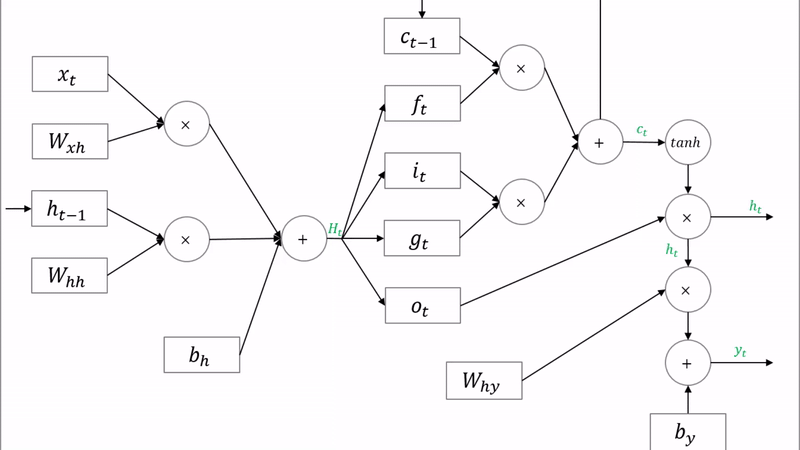

LSTM은 실제로 굉장히 많은 곳에 사용됩니다.

여러 언어 모델에서 LSTM을 사용하고 있습니다.<br/>
Gate가 적용되지 않은 RNN, 즉 Vanilla RNN은 10~20 단어로 이루어진 문장에 대한 분류/생성/번역 등의 성능이 매우 낮습니다.<br/>
Vanilla RNN이 가지고 있는 기울기 소실/폭발 문제 때문입니다.

언어 모델 뿐만 아니라 신경망을 활용한 시계열 알고리즘에는 대부분 LSTM을 사용하고 있습니다.

# GRU

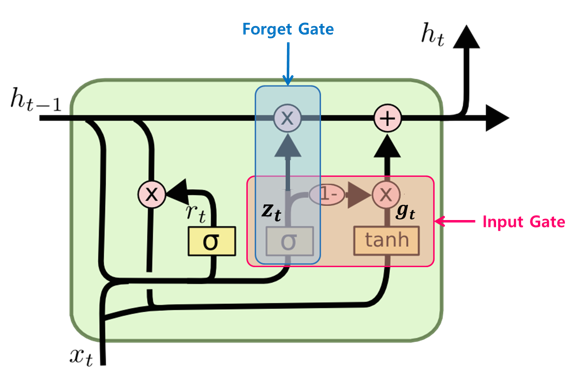

# LSTM Code 실습

IMDB 데이터셋은 영화 리뷰에 대한 텍스트 데이터와 각 리뷰에 대한 이진 레이블(긍정/부정)을 포함하는 데이터셋입니다. 이 데이터셋은 자연어 처리(NLP) 분야에서 텍스트 분류 모델을 훈련시키고 평가하는 데 자주 사용됩니다.

### 데이터셋 구성
- **데이터**: 데이터셋에는 50,000개의 영화 리뷰 텍스트가 포함되어 있습니다.
  - **훈련 데이터(Training Data)**: 25,000개
  - **테스트 데이터(Test Data)**: 25,000개
- **레이블**: 각 리뷰에는 긍정(1) 또는 부정(0)으로 분류된 레이블이 있습니다.
  - **긍정 리뷰**: 리뷰 텍스트가 긍정적인 경우 레이블 1.
  - **부정 리뷰**: 리뷰 텍스트가 부정적인 경우 레이블 0.

### 데이터 전처리
IMDB 데이터셋은 일반적으로 전처리된 상태로 제공됩니다:
- **토큰화(Tokenization)**: 텍스트는 단어별로 토큰화되어 있으며, 각 단어는 고유한 정수 인덱스(단어 인덱스)로 매핑됩니다.
- **단어 인덱스**: 가장 자주 등장하는 단어부터 정수로 인덱싱되어 있습니다. 예를 들어, "the"는 1번, "and"는 2번 등의 방식입니다.
- **패딩(Padding)**: 리뷰의 길이를 일정하게 맞추기 위해 짧은 리뷰는 0으로 패딩되고, 긴 리뷰는 일정 길이까지만 사용됩니다.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.datasets import imdb

In [ ]:
max_features = 20000
maxlen = 80
batch_size = 32

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
len(x_train), len(x_test)

(25000, 25000)

# 패딩 처리

In [ ]:
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)
print(x_train.shape)
print(x_test.shape)

(25000, 80)
(25000, 80)


In [ ]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

### 통계 - max, middle

In [ ]:
import tensorflow as tf

In [ ]:
model = Sequential([
    Embedding(max_features, 128),
    LSTM(128, dropout = 0.2, recurrent_dropout = 0.2),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 3, validation_data = (x_test, y_test))

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 220s 277ms/step - accuracy: 0.7173 - loss: 0.5377 - val_accuracy: 0.8204 - val_loss: 0.4052
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 252s 264ms/step - accuracy: 0.8752 - loss: 0.3113 - val_accuracy: 0.8350 - val_loss: 0.3877
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 253ms/step - accuracy: 0.9208 - loss: 0.2075 - val_accuracy: 0.8325 - val_loss: 0.4422


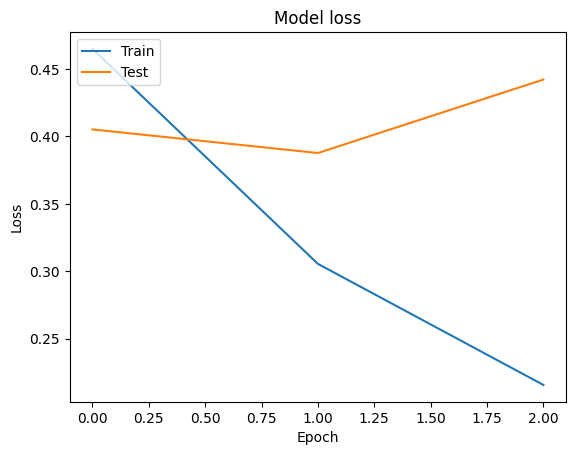

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

# Attention Score

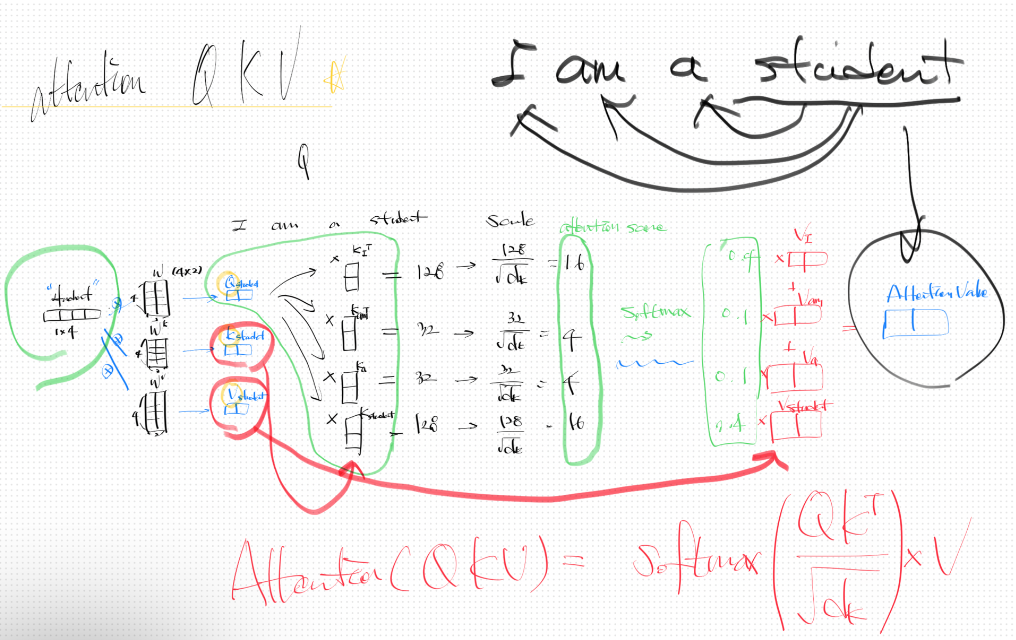